In [ ]:
#Author: Binglin Zhang
#Date: 2019/02/16

In [255]:
import numpy as np
import pandas as pd 

In [256]:
adult = pd.read_csv("/Users/Mark/Desktop/Study/Project/adult.csv")

In [257]:
print(adult.dtypes)

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object


In [258]:
adult.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [325]:
adult.shape

(32561, 15)

In [327]:
col_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
             "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "result"]
adult = pd.read_csv("/Users/Mark/Desktop/Study/Project/adult.csv", names=col_names)
test = pd.read_csv("/Users/Mark/Desktop/Study/Project/adultTest.csv", names=col_names)

In [328]:
test.shape

(16281, 15)

In [329]:
adult.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [330]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [331]:
adult_clean=adult.replace(regex=[r'\?|\.|\$'],value=np.nan)
test_clean=test.replace(regex=[r'\?|\$'],value=np.nan)
#adult_clean.shape
test_clean.shape

(16281, 15)

In [332]:
adult_clean.isnull().any()
test_clean.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
result            False
dtype: bool

In [333]:
adult=adult_clean.dropna(how='any')
test=test_clean.dropna(how='any')

adult=adult.drop(['fnlwgt'],axis=1)
#adult=adult.drop(['education'],axis=1)
test=test.drop(['fnlwgt'],axis=1)

test.shape

(15060, 14)

In [334]:
from sklearn.cross_validation import train_test_split
col_names = ["age", "workclass","education", "education-num", "marital-status", "occupation", 
             "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week",  "native-country","result"]

In [335]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in adult:
   adult[col] = le.fit_transform(adult[col])

for col in test:
   test[col] = le.fit_transform(test[col])


In [372]:
X_train,X_test,y_train,y_test=train_test_split(adult[col_names[1:12]],adult[col_names[13]],test_size=0.25,random_state=33)
# X_train,X_test,y_train,y_test=train_test_split(adult[1:13],adult[13],test_size=0.25,random_state=33)

In [373]:
print(X_train.shape)
print(X_test.shape)

(22621, 11)
(7541, 11)


In [374]:
X_train.head()

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
20607,2,15,9,2,2,0,4,1,0,0,49
31257,2,11,8,2,7,0,2,1,0,0,49
31892,2,11,8,4,0,1,4,0,0,0,44
20220,2,11,8,0,6,4,2,0,0,0,39
24044,2,15,9,0,11,1,4,0,0,0,44


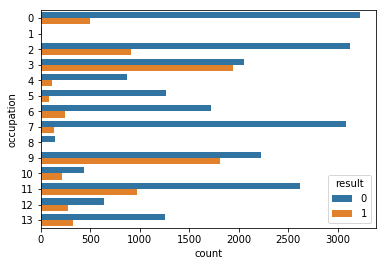

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(y='occupation', hue='result', data=adult,)
plt.show()

In [376]:
train = adult[col_names[1:12]]
target = adult[col_names[13]]
test_train = test[col_names[1:12]]
test_target = test[col_names[13]]

In [377]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
pred = gnb.fit(train, target).predict(test_train)

In [378]:
from sklearn.metrics import accuracy_score
print("Naive-Bayes accuracy : ",accuracy_score(y_test, y_pred, normalize = True))
print("Naive-Bayes accuracy : ",accuracy_score(test_target, pred, normalize = True))

Naive-Bayes accuracy :  0.810635194271
Naive-Bayes accuracy :  0.811088977424


In [381]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.84431772974406583